# Linear Regression
## Introduction
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, meaning the change in the dependent variable is proportional to the change in the independent variable(s). This relationship is represented by a straight line, where the slope of the line indicates the strength and direction of the relationship.

## Explanation of Algorithm in Python
### Import Required Libraries
Import the necessary libraries: numpy for numerical operations, pandas for data manipulation, sklearn for the diabetes dataset, and matplotlib for plotting.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the Dataset
Read the dataset using pandas and extract the features, target, and feature names.

In [5]:
data = pd.read_csv(r"C:\Users\arsha\OneDrive - Manipal Academy of Higher Education\Desktop\Cryptonite\Sample_Datasets\linear_reg_dataset.csv")
features = data.iloc[:, :-1].values
target = data.iloc[:, -1].values
feature_names = data.columns[:-1].tolist()

### Correlation Analysis
Perform correlation analysis between the features, ignoring self-correlation, and print the sorted correlations.

In [6]:
df = pd.DataFrame(features, columns=feature_names)
correlation_matrix = df.corr()
np.fill_diagonal(correlation_matrix.values, 0)
sorted_correlation = correlation_matrix.unstack().sort_values(ascending=False, key=abs)
sorted_correlation

Newspaper  Radio        0.354104
Radio      Newspaper    0.354104
TV         Newspaper    0.056648
Newspaper  TV           0.056648
TV         Radio        0.054809
Radio      TV           0.054809
TV         TV           0.000000
Radio      Radio        0.000000
Newspaper  Newspaper    0.000000
dtype: float64

### Combine Features and Target for Shuffling
Combine the features and target into a single dataset and shuffle the rows randomly.

In [7]:
dataset = np.hstack((features, target.reshape(-1, 1)))
np.random.shuffle(dataset)
dataset

array([[193.2,  18.4,  65.7,  20.2],
       [142.9,  29.3,  12.6,  15. ],
       [213.4,  24.6,  13.1,  17. ],
       [ 19.4,  16. ,  22.3,   6.6],
       [177. ,  33.4,  38.7,  17.1],
       [ 23.8,  35.1,  65.9,   9.2],
       [216.4,  41.7,  39.6,  22.6],
       [ 13.2,  15.9,  49.6,   5.6],
       [168.4,   7.1,  12.8,  16.7],
       [290.7,   4.1,   8.5,  17.8],
       [ 75.5,  10.8,   6. ,  11.9],
       [ 38.2,   3.7,  13.8,   7.6],
       [239.3,  15.5,  27.3,  20.7],
       [123.1,  34.6,  12.4,  15.2],
       [121. ,   8.4,  48.7,  11.6],
       [151.5,  41.3,  58.5,  16.5],
       [ 39.5,  41.1,   5.8,  10.8],
       [248.8,  27.1,  22.9,  18.9],
       [180.8,  10.8,  58.4,  17.9],
       [209.6,  20.6,  10.7,  20.9],
       [239.8,   4.1,  36.9,  17.3],
       [107.4,  14. ,  10.9,  11.5],
       [ 16.9,  43.7,  89.4,   8.7],
       [ 75.1,  35. ,  52.7,  12.6],
       [ 28.6,   1.5,  33. ,   7.3],
       [222.4,   3.4,  13.1,  16.5],
       [283.6,  42. ,  66.2,  25.5],
 

### Split Data into Features and Target
Split the shuffled dataset back into features X and target y.

In [8]:
X = dataset[:, :-1]
y = dataset[:, -1]

### Normalize Features
Normalize the features by subtracting the mean and dividing by the standard deviation, ensuring they have a mean of 0 and a standard deviation of 1.

In [9]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

### Train-Test Split
Split the data into training and test sets (170 samples for training and 30 for testing).

In [10]:
train_size = 170
test_size = 30
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

### Add Bias Term to Features
Add a bias term (a column of ones) to the feature matrices for both the training and test sets.

In [11]:
X_train = np.hstack((np.ones((train_size, 1)), X_train))
X_test = np.hstack((np.ones((test_size, 1)), X_test))

### Initialize Parameters for Gradient Descent
Initialize the weights (including the bias term), learning rate, and convergence threshold for the gradient descent algorithm.

In [12]:
num_features = X.shape[1]
weights = np.zeros(num_features + 1)
learning_rate = 0.01
convergence_threshold = 1e-6

### Perform Gradient Descent
Perform gradient descent to minimize the cost function. Update the weights iteratively, stopping when the change in the cost function is below the convergence threshold.

In [13]:
prev_cost = float("inf")
while True:
    predictions = X_train @ weights
    errors = y_train - predictions
    weights += (learning_rate / train_size) * (X_train.T @ errors)
    
    # Calculate Cost
    current_cost = (1 / (2 * train_size)) * np.sum(errors**2)
    if abs(current_cost - prev_cost) <= convergence_threshold:
        break
    prev_cost = current_cost

### Make Predictions on Test Data
Make predictions on the test set using the learned weights.

In [14]:
y_pred = X_test @ weights

### Visualize Actual vs Predicted Values
Plot the predicted vs actual values on a scatter plot and overlay a red line representing the ideal fit (y = x). This allows us to visualize how well the model's predictions match the actual values.

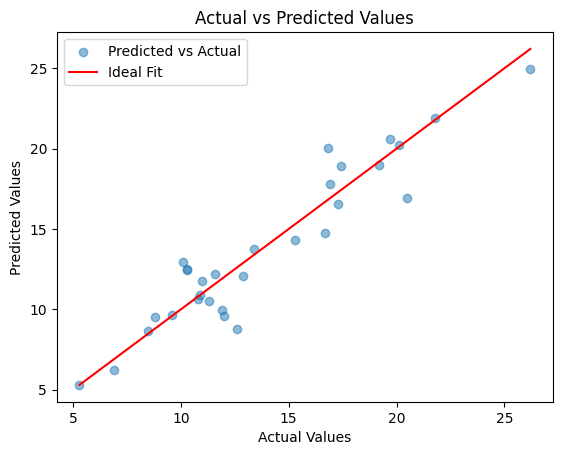

In [15]:
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

# Theory for Linear Regression

To perform supervised learning, we must decide how we’re going to represent functions/hypotheses $h$ in a computer. As an initial choice, let’s say we decide to approximate $y$ as a linear function of $x$:    
$$ h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

Here, the $ \theta_i $'s are the parameters (also called weights) parameterizing the space of linear functions mapping from $X$ to $Y$. In the following equation, let us consider $ \theta $ and $ x $ to be vectors, and $ d $ is the number of input variables excluding $ x_0 $. To simplify our notation, we also introduce the convention of letting $ x_0 = 1 $ (intercept term), so that:  
$$ h(x) = \sum_{i=0}^{d} \theta_i x_i = \theta^T x $$

To choose the parameters, we want to make $ h(x) $ close to $ y $, at least for the training examples we have. To formalize this, we will define a function that measures, for each value of the $ \theta $'s, how close the $ h(x^{(i)}) $'s are to the corresponding $ y^{(i)} $'s. We define the cost function:  
$$ J(\theta) = \frac{1}{2} \sum_{i=1}^{n} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right)^2 $$  

## Gradient Descent Algorithms

Gradient descent is an optimization algorithm used to minimize the cost function of a machine learning model. The goal of gradient descent is to iteratively update the model's parameters in the direction of the negative gradient of the cost function.  

### Batch Gradient Descent

In Batch Gradient Descent, the model parameters are updated based on the average of the gradients computed using the entire dataset. This approach can be computationally expensive when dealing with large datasets but ensures convergence to the global minimum in convex functions.    
Given the cost function $ J(\theta) $, where $ \theta $ represents the parameters (weights), and $ m $ is the number of training examples, the gradient descent update rule for Batch Gradient Descent is:  

$$
\theta^{(t+1)} = \theta^{(t)} - \frac{\alpha}{m} \sum_{i=1}^{m} \nabla_\theta J(\theta^{(t)}, x^{(i)}, y^{(i)})
$$

In this equation:  
- $ \theta^{(t)} $ is the current parameter vector at iteration $ t $,
- $ \alpha $ is the learning rate,
- $ m $ is the total number of training examples,
- $ \nabla_\theta J(\theta^{(t)}, x^{(i)}, y^{(i)}) $ is the gradient of the cost function with respect to $ \theta $ for the $ i $-th training example $ (x^{(i)}, y^{(i)}) $.

In Batch Gradient Descent, the update step is computed using the entire dataset at each iteration.  

### Stochastic Gradient Descent 

In Stochastic Gradient Descent, the model parameters are updated after computing the gradient using a single training example. This makes the algorithm much faster and allows it to start learning from the very first example. However, the updates are noisy and may not converge as smoothly as Batch Gradient Descent.  
For Stochastic Gradient Descent, the update rule becomes:  

$$
\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla_\theta J(\theta^{(t)}, x^{(i)}, y^{(i)})
$$  

In this equation:  
- $ \theta^{(t)} $ is the current parameter vector at iteration $ t $,
- $ \alpha $ is the learning rate,
- $ \nabla_\theta J(\theta^{(t)}, x^{(i)}, y^{(i)}) $ is the gradient of the cost function with respect to $ \theta $ for the $ i $-th training example $ (x^{(i)}, y^{(i)}) $.

In Stochastic Gradient Descent, the update is made using only a single training example $ (x^{(i)}, y^{(i)}) $ at each iteration. This results in faster updates but can lead to fluctuations in the cost function.  
  